## 3. Styles

**earthkit-maps** provides a flexible interface for defining and applying styles to your plots.

In [1]:
import earthkit.data
import earthkit.maps

### The `Style` class - basic styles

To define a style in **earthkit-maps**, instantiate a `Style` object. The core (optional) arguments this can take are:
- `colors`: either a list of named colours or a [named matpltolib colormap](https://matplotlib.org/stable/gallery/color/colormap_reference.html) - if none, the default colour scheme (matplotlib's "magma") will be used.
- `levels`: either a list of levels, or an `earthkit.maps.styles.levels.Levels` object (we'll come to this later in the tutorial!). If no levels are passed, then suitable levels will be calculated based on your input data.
- `units`: the units of the provided levels. If a `Style` is defined with some associated units, then any data plotted with that `Style` will be converted to the `Style` units.

Let's get some sample data that we can use to experiment with different styles.

In [4]:
earthkit.data.download_example_file("era5-2m-temperature-dec-1993.grib")
data = earthkit.data.from_source("file", "era5-2m-temperature-dec-1993.grib")

We have some global temperature data, so let's define a simple style which ranges from -40 to +30 degrees celsius in steps of 5.

In [9]:
style = earthkit.maps.Style(
    levels=range(-40, 31, 5),
    units="celsius",
)

To plot our data using this style, we simply pass the `style` argument to `earthkit.maps.quickplot` (note that this also works with `earthkit.maps.Chart.plot()`!).

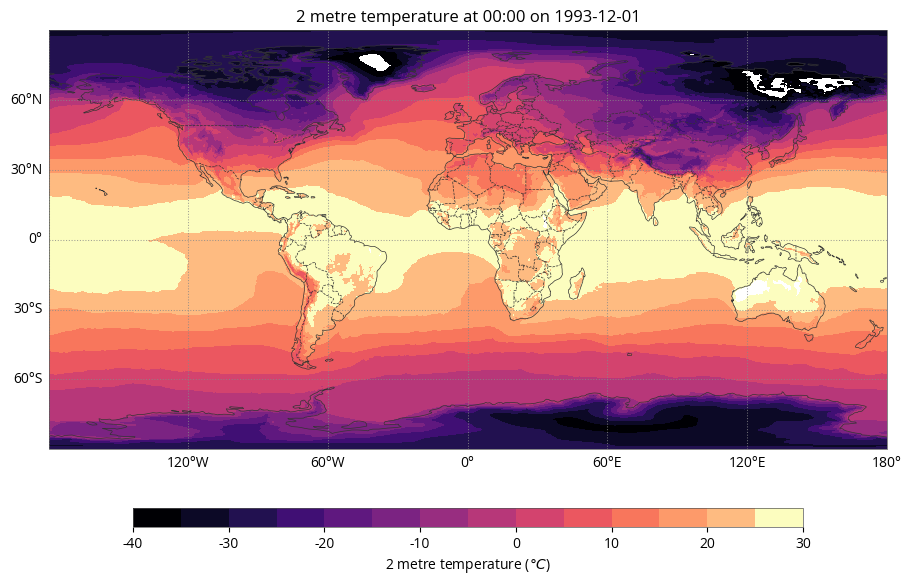

In [10]:
earthkit.maps.quickplot(data, style=style)

This looks okay, but there is some data which falls outside both ends of the scale - for example over Greenland and Australia. We could adjust our scale to make sure it fits our data range, or we can pass `extend="both"` into the style definition to make sure it captures data which falls outside the scale:

In [11]:
style = earthkit.maps.Style(
    levels=range(-40, 31, 5),
    units="celsius",
    extend="both",
)

Let's try plotting with this new style:

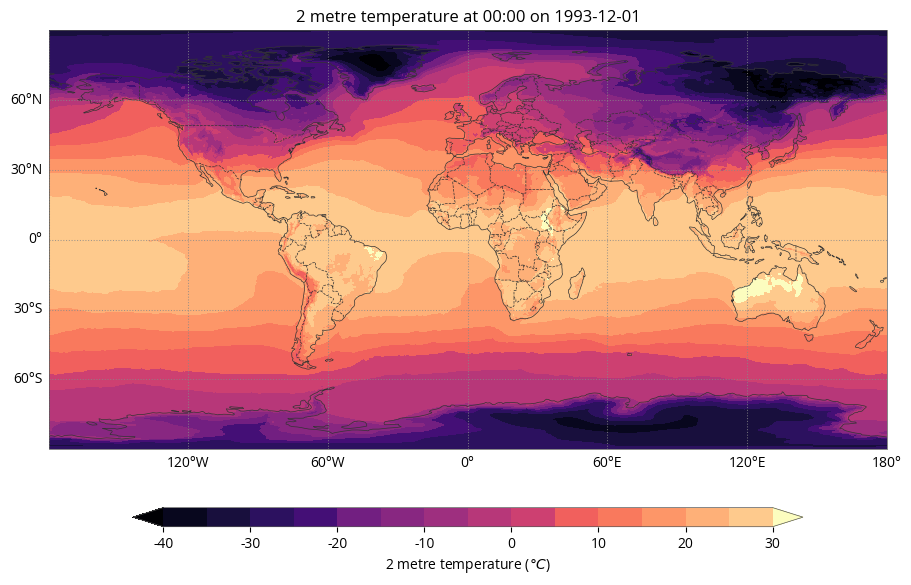

In [12]:
earthkit.maps.quickplot(data, style=style)

The colour scale now shows extended arrows above and below the maximimum and minimum values to capture data which falls outside of the scale. Note that the colours in the palette have also shifted to accommodate the wider data range.

### The `Contour` class

In [39]:
style = earthkit.maps.styles.Contour(
    colors="turbo",
    line_colors="blue",
    labels=True,
    levels=range(-40, 31, 5),
    units="celsius",
    extend="both",
)

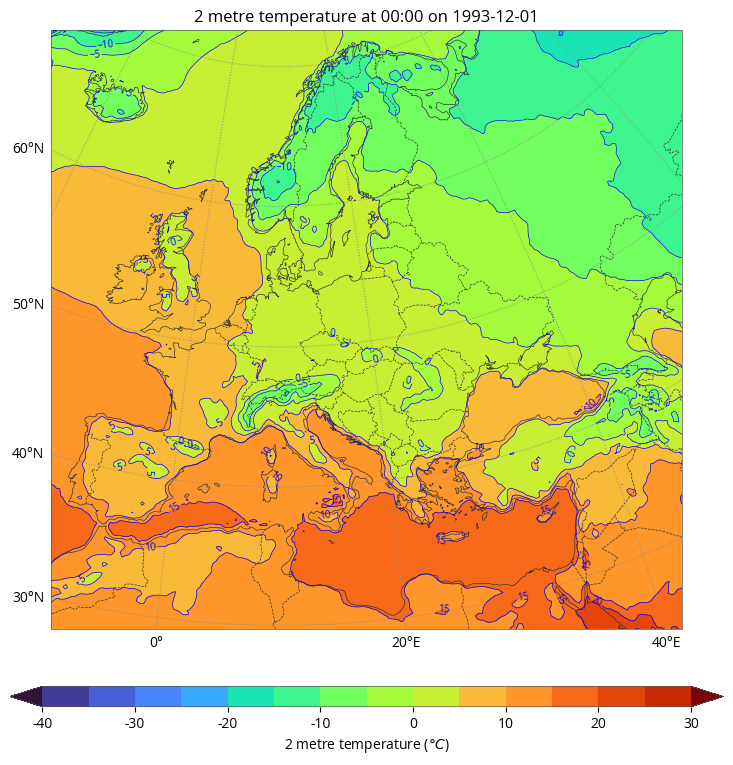

In [40]:
earthkit.maps.quickplot(data, domain="Europe", style=style)